In [1]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('train_LZdllcl.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.rename(columns={'KPIs_met >80%':'KPIs'}, inplace=True)

In [5]:
df.rename(columns={'awards_won?':'awards_won_not'}, inplace=True)

In [6]:
df.previous_year_rating=df.previous_year_rating.astype('object')

In [7]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs,awards_won_not,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1,2,0,0,45,0


In [8]:
dfd=df.copy()

In [9]:
for i in ('no_of_trainings','KPIs','previous_year_rating','awards_won_not'):
    dfd[i]=dfd[i].astype('object')

In [10]:
dfd.dtypes

employee_id              int64
department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings         object
age                      int64
previous_year_rating    object
length_of_service        int64
KPIs                    object
awards_won_not          object
avg_training_score       int64
is_promoted              int64
dtype: object

Text(0.5, 1.0, '% of Results')

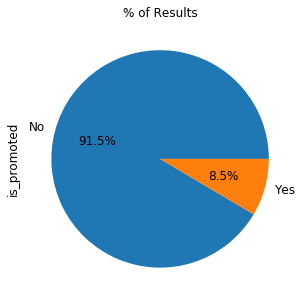

In [11]:
ax = (df['is_promoted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('is_promoted',fontsize = 12)
ax.set_title('% of Results', fontsize = 12)

In [12]:
# RFD Analysis

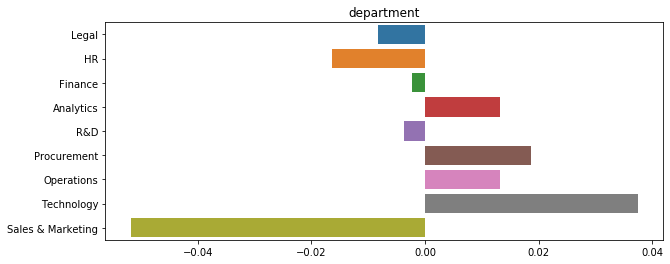

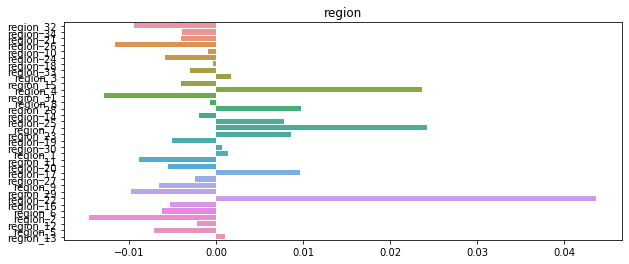

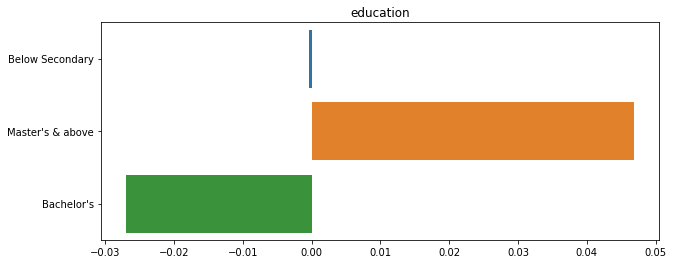

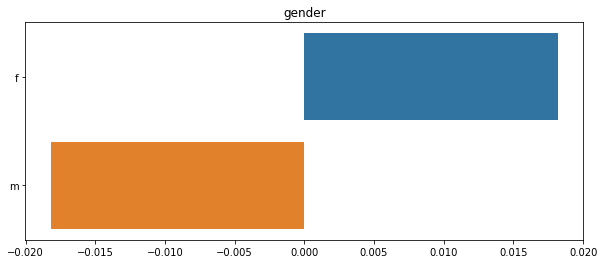

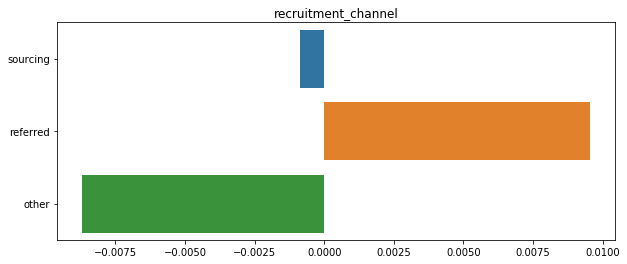

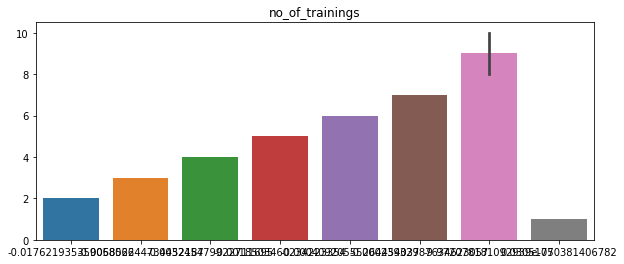

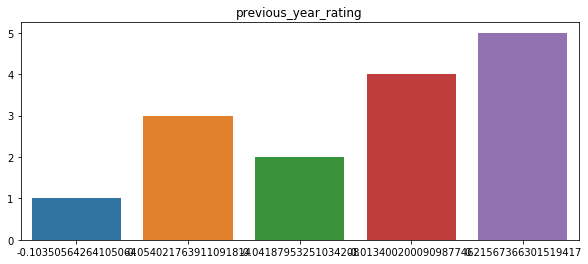

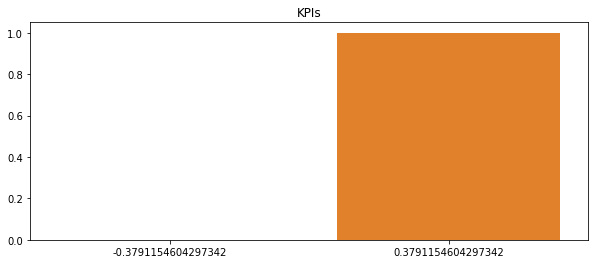

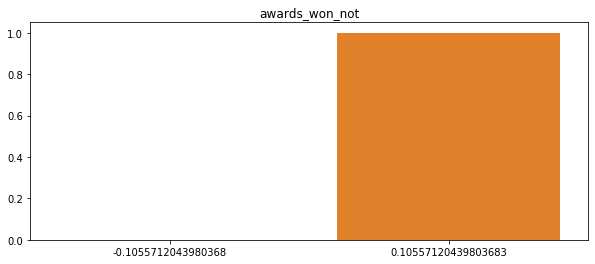

In [13]:
cat_feat=dfd.select_dtypes(include='object')
for i in cat_feat:
    plt.figure(figsize=(10,4))
    p_count=dfd.loc[dfd.is_promoted .values==1,i].value_counts()
    n_count=dfd.loc[dfd.is_promoted.values==0,i].value_counts()
    
    tot_counts=list(set(list(p_count.index)+list(n_count.index)))
    
    freq_pcount=(dfd.is_promoted.values==1).sum()
    freq_ncount=(dfd.is_promoted.values==0).sum()
    p_count=p_count.to_dict()
    n_count=n_count.to_dict()
    
    
    m_index=list(tot_counts)
    tot_counts=[p_count.get(k,0)/freq_pcount - n_count.get(k,0)/freq_ncount for k in tot_counts]
    sns.barplot(tot_counts,m_index)
    plt.tight_layout
    plt.title(i)

In [14]:
def percentage_ct(df,col1,target):
    val=pd.crosstab(df[col1],df[target])
    val[f'{col1} vs {target}']=round(val[1]*100/(val[0]+val[1]),2)
    ct=val.sort_values(by=f'{col1} vs {target}')
    return ct

In [15]:
def donut(df,col_name):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

    wedges,text=plt.pie(df[col_name],wedgeprops=dict(width=0.5)\
                        , startangle=-40)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")


    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/10. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate( f'{list(df.index)[i]}\n {list(df[col_name])[i]} %', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
        plt.title(col_name)

In [16]:
dept=percentage_ct(df,'department','is_promoted')

In [43]:
dept

is_promoted,0,1,department vs is_promoted
department,,,
Legal,986,53,5.10
HR,2282,136,5.62
R&D,930,69,6.91
Sales & Marketing,15627,1213,7.20
Finance,2330,206,8.12
Operations,10325,1023,9.01
Analytics,4840,512,9.57
Procurement,6450,688,9.64
Technology,6370,768,10.76


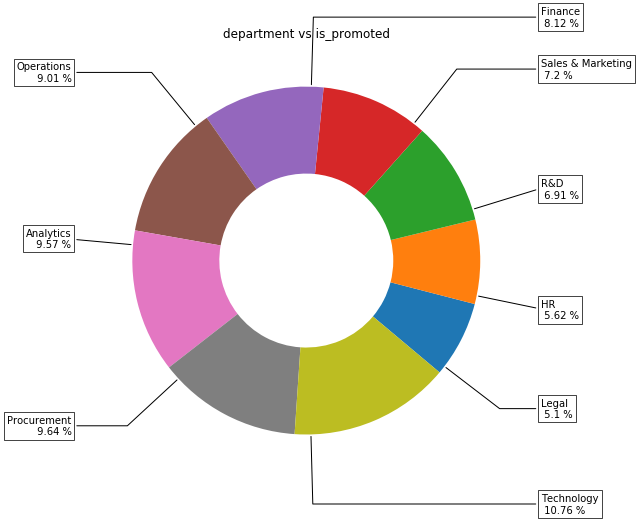

In [17]:
donut(dept,'department vs is_promoted')

In [18]:
region=percentage_ct(df,'region','is_promoted')

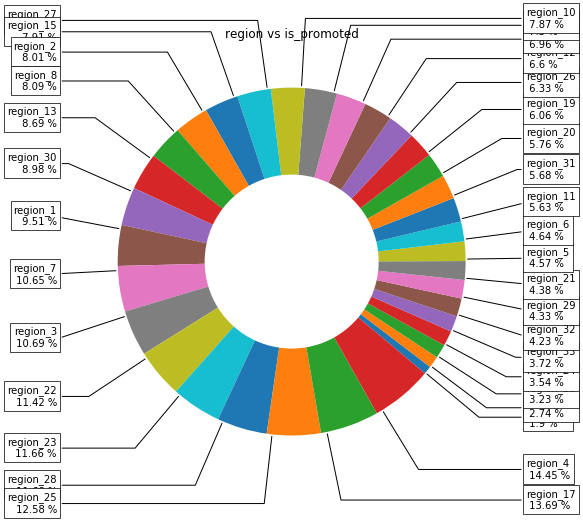

In [19]:
donut(region,'region vs is_promoted')

In [20]:
edu=percentage_ct(df,'education','is_promoted')

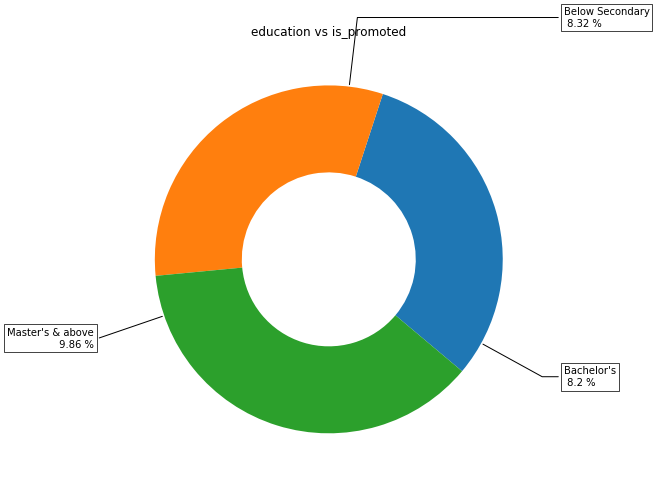

In [21]:
donut(edu,'education vs is_promoted')

In [22]:
channel=percentage_ct(df,'recruitment_channel','is_promoted')

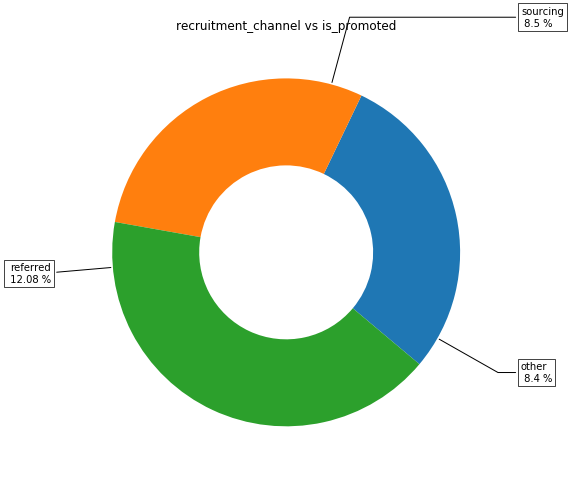

In [23]:
donut(channel,'recruitment_channel vs is_promoted')

In [24]:
trainings=percentage_ct(df,'no_of_trainings','is_promoted')

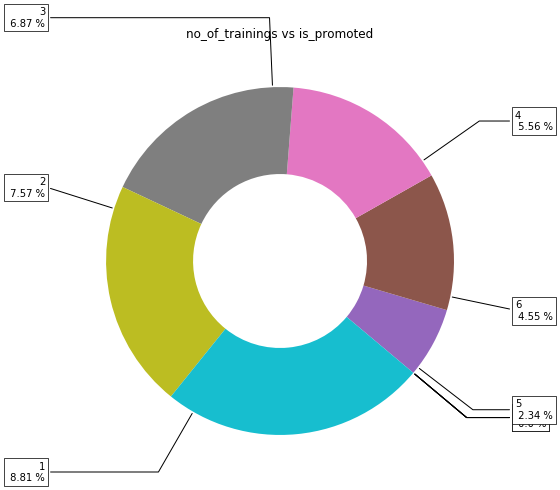

In [25]:
donut(trainings,'no_of_trainings vs is_promoted')

In [26]:
ratings=percentage_ct(df, 'previous_year_rating', 'is_promoted')

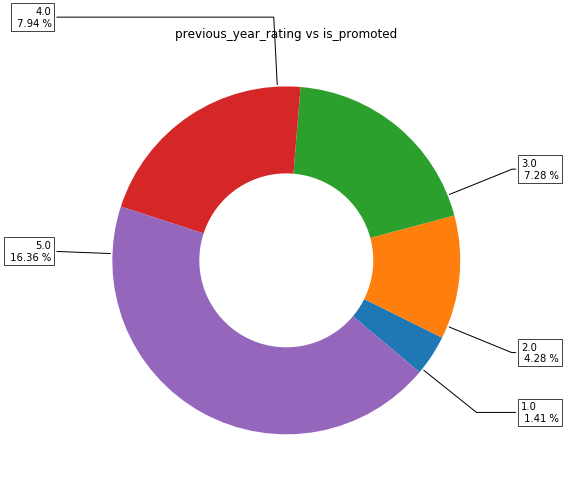

In [27]:
donut(ratings,'previous_year_rating vs is_promoted')

In [28]:
kpi=percentage_ct(df,'KPIs','is_promoted')

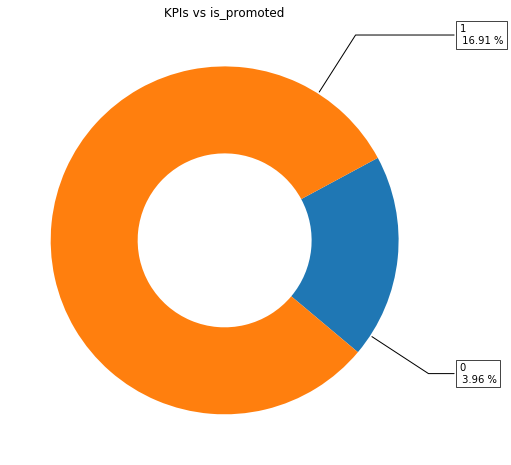

In [29]:
donut(kpi,'KPIs vs is_promoted')


In [30]:
awards=percentage_ct(df,'awards_won_not','is_promoted')

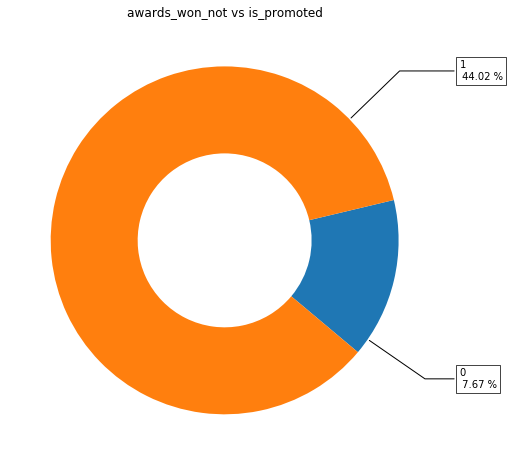

In [31]:
donut(awards,'awards_won_not vs is_promoted')

In [32]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs,awards_won_not,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1,2,0,0,45,0


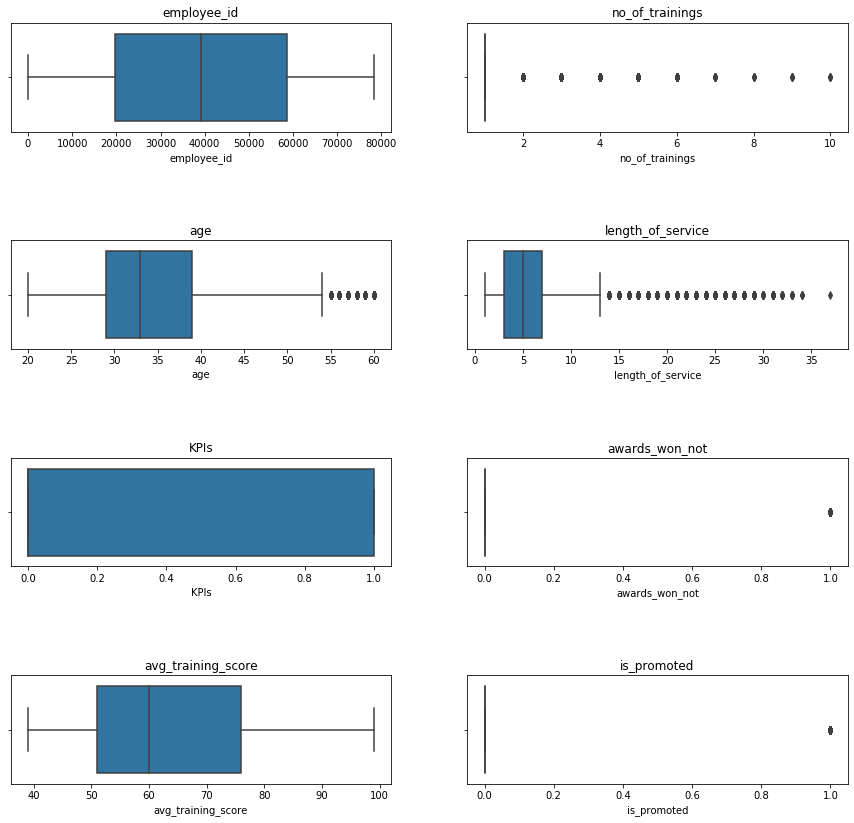

In [33]:
features=list(df.select_dtypes(exclude=['object','datetime64','timedelta64[ns]']))
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.title(j)


In [34]:
import numpy as np

In [35]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
    return missing_data


In [36]:
missing(df)

,Total,Percent
previous_year_rating,4124,7.524449
education,2409,4.395344
is_promoted,0,0.000000
avg_training_score,0,0.000000
awards_won_not,0,0.000000
KPIs,0,0.000000
length_of_service,0,0.000000
age,0,0.000000
no_of_trainings,0,0.000000
recruitment_channel,0,0.000000


In [37]:
df.groupby('department')['education'].apply(lambda x :x.isnull().sum())

department
Analytics             337
Finance                36
HR                     32
Legal                   4
Operations            226
Procurement            72
R&D                    28
Sales & Marketing    1575
Technology             99
Name: education, dtype: int64

In [38]:
df.groupby('department')['education'].value_counts()

department         education       
Analytics          Bachelor's           3978
                   Master's & above     1037
Finance            Bachelor's           1895
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1525
                   Master's & above      733
                   Below Secondary       128
Legal              Bachelor's            814
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7781
                   Master's & above     3165
                   Below Secondary       176
Procurement        Bachelor's           4393
                   Master's & above     2544
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11099
                   Master's & above     4166
Technology         

In [39]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [40]:
df.education=df.education.fillna(df.education.value_counts()[0])
df.previous_year_rating=df.previous_year_rating.fillna(df.previous_year_rating.mean())

In [41]:
missing(df)

,Total,Percent
is_promoted,0,0.0
avg_training_score,0,0.0
awards_won_not,0,0.0
KPIs,0,0.0
length_of_service,0,0.0
previous_year_rating,0,0.0
age,0,0.0
no_of_trainings,0,0.0
recruitment_channel,0,0.0
gender,0,0.0


In [42]:
features=list(df_log.select_dtypes(exclude=['object','datetime64','timedelta64[ns]']))
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df_log[j])
    plt.title(j)


NameError: name 'df_log' is not defined

In [ ]:
df

In [ ]:
from sklearn import preprocessing

In [ ]:
df.education=df.education.apply(lambda x : "Bachelor's" if x==36669 else x)

In [ ]:
df=df.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
df.education.unique()

In [ ]:
df

In [ ]:
X=df.drop(['is_promoted','employee_id'] ,axis=1)
y=df.is_promoted

In [ ]:
def get_best_model(estimator, params_grid={}):

    model = GridSearchCV(estimator = estimator,param_grid = params_grid,cv=3, scoring="accuracy", n_jobs= -1)
    model.fit(xtrain,ytrain)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
lg = LogisticRegression(random_state=3)
parameters = {'C':[0.8,0.9,1],
'penalty':['l1','l2']}


In [ ]:
clf_lg = get_best_model(lg,parameters)

In [ ]:
log=LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
log.fit(xtrain,ytrain)

In [ ]:
log.score(xtrain,ytrain)

In [ ]:
log_pred=log.predict(xtest)

In [ ]:
from sklearn import metrics

In [ ]:
test_score_log=metrics.accuracy_score(ytest,log_pred)

In [ ]:
test_score_log

In [ ]:
# Log Transformed model

In [ ]:
df_log=df.drop(['is_promoted','employee_id'] ,axis=1)

In [ ]:
log_trans=df[['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']]
df_log=df.drop(columns=['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score'])
log_trans=np.log1p(log_trans)
df_log=pd.concat([df_log,log_trans], axis=1)

In [ ]:
df_log

In [ ]:
X=df_log.drop(['employee_id','is_promoted'], axis=1)
y=df.is_promoted

In [ ]:
X

In [ ]:
xtrain_log,xtest_log,ytrain_log,ytest_log=train_test_split(X,y, test_size=0.3,random_state=42)

In [ ]:
log

In [ ]:
log.fit(xtrain_log,ytrain_log)

In [ ]:
log.score(xtrain_log,ytrain_log)

In [ ]:
pred_log_trans=log.predict(xtest_log)

In [ ]:
log_trans_score=metrics.accuracy_score(ytest,pred_log_trans)

In [ ]:
log_trans_score

In [ ]:
# Feature Engineering

In [ ]:
trainings

In [ ]:
dfd.education=dfd.education.apply(lambda x : "Bachelor's" if x==36669 else x)

In [ ]:
t_map={7:0,8:0,9:0,10:0,5:1,6:2,4:3,3:4,2:5,1:6}

In [ ]:
dfd.no_of_trainings=dfd.no_of_trainings.map(t_map)

In [ ]:
percentage_ct(dfd,'no_of_trainings','is_promoted')

In [ ]:
channel

In [ ]:
c_map={'other':0,'sourcing':0,'referred':1}

In [ ]:
dfd.recruitment_channel=dfd.recruitment_channel.map(c_map)

In [ ]:
percentage_ct(dfd,'recruitment_channel','is_promoted')

In [ ]:
region

In [ ]:
s = {}
a=list(region.index)
for i in a:
    s[i]=a.index(i)
dfd.region=dfd.region.map(s)  

In [ ]:
percentage_ct(dfd,'region','is_promoted')

In [ ]:
edu

In [ ]:
e_map={"Bachelor's":0,'Below Secondary':0,"Master's & above":1}

In [ ]:
dfd.education=dfd.education.map(e_map)

In [ ]:
percentage_ct(dfd,'education','is_promoted')

In [ ]:
d_map={}
d=list(dept.index)
for i in d:
    d_map[i]=d.index(i)
dfd.department=dfd.department.map(d_map)

In [ ]:
dept

In [ ]:
percentage_ct(dfd,'department','is_promoted')

In [ ]:
dfd.drop('employee_id', axis=1, inplace=True)

In [ ]:
dfd

In [ ]:
missing(dfd)

In [ ]:
dfd.education=df.education.fillna(0)
dfd.previous_year_rating=dfd.previous_year_rating.fillna(dfd.previous_year_rating.mean())

In [ ]:
missing(dfd)

In [ ]:
dfd=dfd.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
dfd

In [ ]:
X_f=dfd.drop('is_promoted',axis=1)
y_f=dfd.is_promoted

In [ ]:
xf_train,xf_test,yf_train,yf_test=train_test_split(X_f,y_f, test_size=0.3, random_state=42)

In [ ]:
log.fit(xf_train,yf_train)

In [ ]:
log.score(xf_train,yf_train)

In [ ]:
f_pred=log.predict(xf_test)

In [ ]:
f_pred_score=metrics.accuracy_score(yf_test,f_pred)

In [ ]:
f_pred_score

In [ ]:
# feature engineering and log transform

In [ ]:
log_trans=dfd[['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']]
dfd_log=dfd.drop(columns=['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score'])
log_trans=np.log1p(log_trans)
dfd_log=pd.concat([dfd_log,log_trans], axis=1)

In [ ]:
X_flog=dfd_log.drop('is_promoted',axis=1)
y=df.is_promoted

In [ ]:
xf_train_log,xf_test_log,yf_train_log,yf_test_log=train_test_split(X_flog,y, test_size=0.3, random_state=42)

In [ ]:
log.fit(xf_train_log,yf_train_log)

In [ ]:
log.score(xf_train_log,yf_train_log)

In [ ]:
log_fpred=log.predict(xf_test_log)

In [ ]:
flog_score=metrics.accuracy_score(yf_test_log,log_fpred)

In [ ]:
flog_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt.fit(xf_train_log,yf_train_log)

In [ ]:
# Base model Decission tree

In [ ]:
dt.score(xtrain,ytrain)

In [ ]:
dt_pred=dt.predict(xtest)

In [ ]:
metrics.accuracy_score(ytest,dt_pred)

In [ ]:
# log model Decision tree

In [ ]:
dt.fit(xtrain_log,ytrain_log)
print(dt.score(xtrain_log,ytrain_log))
dt_pred_log_trans=log.predict(xtest_log)
dt_log_trans_score=metrics.accuracy_score(ytest,dt_pred_log_trans)

In [ ]:
dt_log_trans_score

In [ ]:
# Festure engineered Decision Tree

In [ ]:
dt.fit(xf_train,yf_train)
print(dt.score(xf_train,yf_train))
dt_fpred_trans=log.predict(xf_test)
dt_f_trans_score=metrics.accuracy_score(ytest,dt_fpred_trans)

In [ ]:
dt_f_trans_score

In [ ]:
# Feature engineered log_trans decision Tree

In [ ]:
dt.fit(xf_train_log,yf_train_log)
print(dt.score(xf_train_log,yf_train_log))
dt_fpredlog_trans=log.predict(xf_test_log)
dt_f_translog_score=metrics.accuracy_score(ytest,dt_fpredlog_trans)

In [ ]:
dt_f_translog_score